In [2]:
import pandas as pd
import numpy as np
import string as s
import matplotlib.pyplot as plt
import nltk
import pickle
import re
import math
import random
import warnings
import seaborn as sns
from wordcloud import WordCloud
from sklearn.utils import resample,shuffle
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
%matplotlib inline
stop = stopwords.words('english')
warnings.filterwarnings('ignore')
lemmatizer = WordNetLemmatizer()

In [3]:
df = pd.read_csv('spam.csv',encoding="cp1252")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'Status', 'v2': 'MessageText'})
df.head()

,Status,MessageText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
len(df)

5572

In [6]:
print(df['Status'].isna().sum()) #checking missing values
print(df['MessageText'].isna().sum())

0
0


In [7]:
df['Status'].value_counts()

ham     4825
spam     747
Name: Status, dtype: int64

<AxesSubplot:>

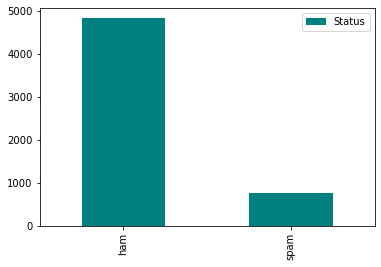

In [8]:
df['Status'].value_counts().plot(kind='bar', legend=True, color="teal")

<AxesSubplot:ylabel='Status'>

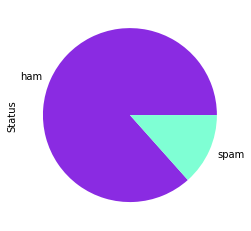

In [9]:
pie_colors = ["blueviolet", "aquamarine"]
df['Status'].value_counts().plot(kind='pie' , colors = pie_colors)

In [10]:
df['MessageText'] = df['MessageText'].str.lower() #make all the letters lowercase
df['MessageText'] = df.apply(lambda row: nltk.word_tokenize(row['MessageText']), axis=1) #tokenize the sentences

In [11]:
def punctuation_remove(token): #remove function for punctuations
    clean_words=[]
    for i in token:
        for j in s.punctuation:
            i=i.replace(j,'')
        clean_words.append(i)
    return clean_words

In [12]:
df['MessageText'] = df['MessageText'].apply(punctuation_remove)

In [13]:
def space_remove(token): #remove function for extra spaces
    non_space_list=[]
    for i in token:
        i = i.strip()
        non_space_list.append(i)
    return non_space_list

In [14]:
df['MessageText'] = df['MessageText'].apply(space_remove)

In [15]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

In [16]:
df['MessageText'] = df['MessageText'].apply(lemmatize_text)
df['MessageText'] = df.MessageText.apply(lambda x: [w.strip() for w in x if w.strip() not in stop])

In [17]:
df['MessageText'][:5]

0    [go, jurong, point, , crazy, , available, bugi...
1                   [ok, lar, , joking, wif, u, oni, ]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3    [u, dun, say, early, hor, , u, c, already, say, ]
4    [nah, nt, think, go, usf, , life, around, though]
Name: MessageText, dtype: object

In [18]:
df['Status'] = df['Status'].replace({'spam':1, 'ham':0})

In [19]:
df['data'] = ""
for i in df.index:
    df.at[i, 'data'] = " ".join(item for item in df.at[i, 'MessageText'])
data = df['data']

X = data
y = df['Status']

In [20]:
bag_of_words = {}
for vocab in X:
    words = nltk.word_tokenize(vocab)
    for word in words:
        if word not in bag_of_words.keys():
            bag_of_words[word] = 1
        else:
            bag_of_words[word] += 1
bag_of_words

{'go': 306,
 'jurong': 1,
 'point': 33,
 'crazy': 15,
 'available': 17,
 'bugis': 7,
 'n': 148,
 'great': 114,
 'world': 40,
 'la': 7,
 'e': 84,
 'buffet': 2,
 'cine': 7,
 'got': 251,
 'amore': 1,
 'wat': 107,
 'ok': 284,
 'lar': 38,
 'joking': 6,
 'wif': 27,
 'u': 1227,
 'oni': 4,
 'free': 278,
 'entry': 26,
 '2': 485,
 'wkly': 14,
 'comp': 11,
 'win': 76,
 'fa': 4,
 'cup': 8,
 'final': 18,
 'tkts': 4,
 '21st': 3,
 'may': 49,
 '2005': 3,
 'text': 215,
 '87121': 4,
 'receive': 38,
 'question': 33,
 'std': 11,
 'txt': 169,
 'rate': 34,
 'c': 153,
 'apply': 31,
 '08452810075over18': 2,
 'dun': 55,
 'say': 118,
 'early': 33,
 'hor': 2,
 'already': 91,
 'nah': 10,
 'nt': 377,
 'think': 146,
 'usf': 11,
 'life': 83,
 'around': 61,
 'though': 27,
 'freemsg': 14,
 'hey': 112,
 'darling': 7,
 '3': 81,
 'week': 134,
 'word': 60,
 'back': 153,
 'like': 247,
 'fun': 32,
 'still': 155,
 'tb': 5,
 'xxx': 32,
 'chgs': 1,
 'send': 191,
 'å£150': 29,
 'rcv': 2,
 'even': 62,
 'brother': 20,
 'speak': 3

In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X).toarray() 

In [22]:
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(X)  

In [23]:
train_x,test_x,train_y,test_y=train_test_split(X ,y,test_size=0.20,random_state=1)

In [24]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x,train_y)
y_new_pred = knn.predict(test_x)

In [25]:
print("Accuracy score:" , "{:.4f}".format(accuracy_score(test_y,y_new_pred)))

Accuracy score: 0.9274


In [26]:
NB=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) #NaiveBayes
NB.fit(train_x,train_y)
y_pred=NB.predict(test_x)

In [27]:
print("Accuracy score:" , "{:.4f}".format(accuracy_score(test_y,y_pred)))

Accuracy score: 0.9731


In [28]:
print("Confusion Matrix: " , '\n' , confusion_matrix(test_y, y_pred))

Confusion Matrix:  
 [[975   1]
 [ 29 110]]


In [29]:
print("Pretty Confusion Matrix:")
display(pd.DataFrame(confusion_matrix(test_y, y_pred, labels=np.unique(test_y)),
                         index=['pred:' + str(x) for x in np.unique(test_y)],
                         columns=['true:' + str(x) for x in np.unique(test_y)]))

Pretty Confusion Matrix:


,true:0,true:1
pred:0,975,1
pred:1,29,110


In [30]:
print("Classification Report")
target_names = ['ham','spam']
print(classification_report(test_y, y_pred, target_names = target_names))

Classification Report
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       976
        spam       0.99      0.79      0.88       139

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [31]:
result_df = pd.DataFrame({'Predictions': y_pred})
result_df['Predictions'].value_counts()

0    1004
1     111
Name: Predictions, dtype: int64

In [32]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.91928251 0.91838565 0.91292639 0.92010772 0.91741472]
cv_scores mean:0.9176233988938177


In [33]:
w_data = data.str.cat(sep=' ')
w_data = word_tokenize(w_data)
frequency_dist = FreqDist(w_data)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:10]

['u', 'call', '2', 'get', 'ur', 'nt', 'gt', 'lt', 'go', '4']

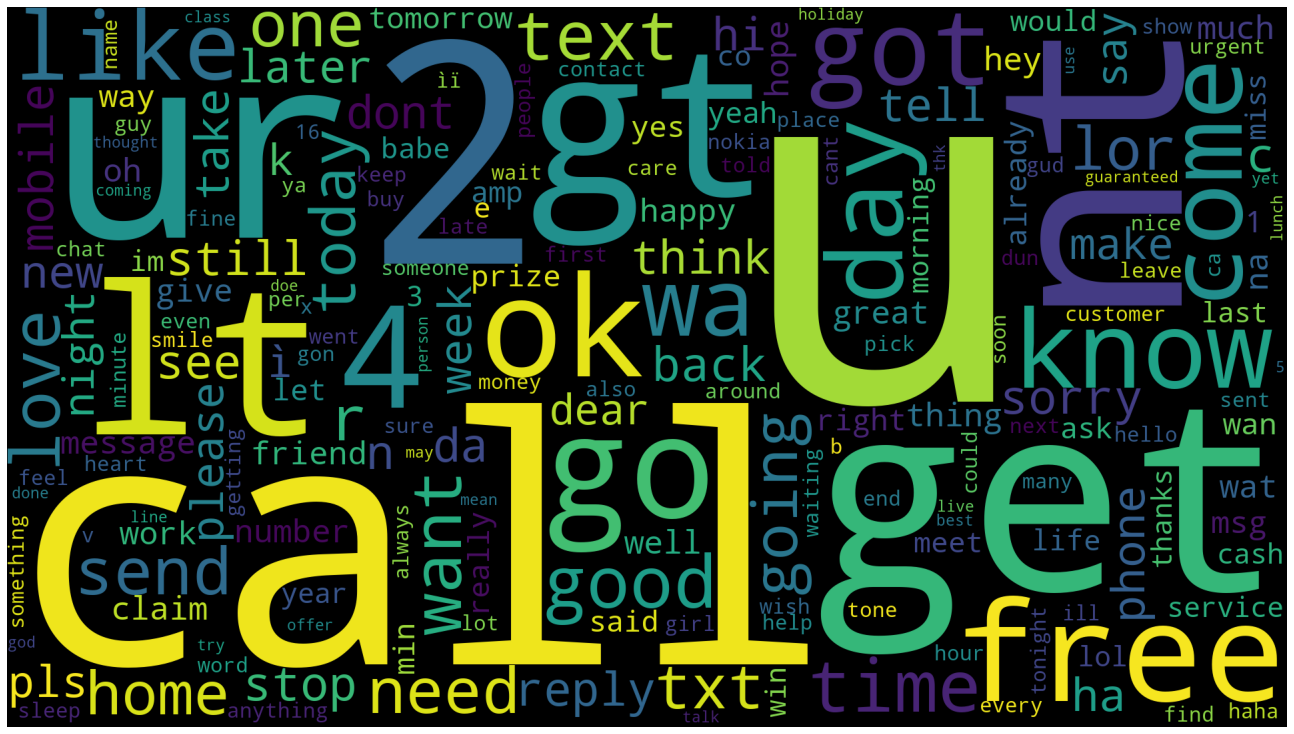

In [34]:
sns.set();
wordcloud = WordCloud(width=1920, #1920 x 1080 
                      height=1080,
                      stopwords=stopwords.words('english')).generate_from_frequencies(frequency_dist)

fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

fig.savefig('word_cloud.jpg', dpi=100)